### Lab 2: Probability, Distributions, and Statistical Questions
#### Jennifer Vo, partners with William Olsen

#### Problem 1

In this lab we will further explore probability, the use of sigma, and continuous and discrete distributions. In particular, we will look at using the convolutions and averages of multiple distributions and apply them to several hypothetical experiments.

In [2]:
# importing libraries we will use in the lab
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# setting up graphing figure size
plt.rcParams["figure.figsize"] = (10,7)
# TO DO: FINISH 4
# WRITE UP AND CLEAN UP
# Normalize graphs after every convolution/averaging process in order to plot them on the same.
    # Normalization expectations:
    # For discrete, bin-width are all 1, pmf value must be <1. Integral will just be a sum.
    # For continuous, bin-width is less than 1, pdf value can be >1. Integral will include the dx, so pdf values > 1 is fine.

For this first problem, let's imagine that we are looking for gamma-ray sources with the Fermi telescope, which has a background of cosmic rays that provides a discrete noise term following a Poisson distribution with an average of 2 cosmic rays/day. To detect a gamma-ray source, I need to ask, "what is the probability that the cosmic-ray background would have given me a measurement as signal-like or more than the signal that I received?" I will assume that the average number of gamma-rays emitted by my hypothetical source is 5 gamma rays/day.

##### Part A. 
First, I will show how the probability distribution of the background changes as I integrate (sum) for more days.

I will start by plotting the background Poisson distribution.

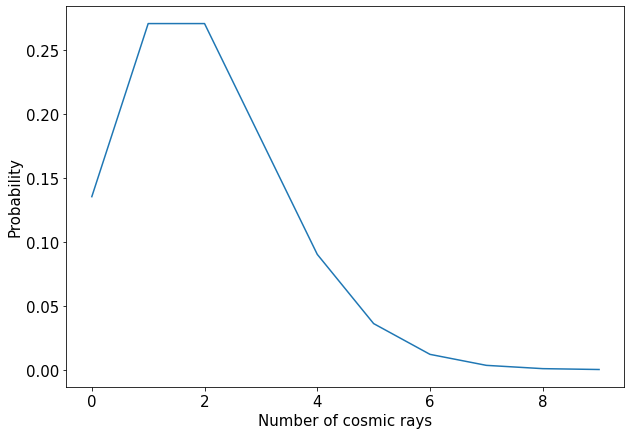

In [2]:
# Poisson lambda parameter = 2 rays/day
avg_bg = 2

# Gamma ray source average = 5 rays/day
avg_gr = 5

# Create the background Poisson distribution
fig, ax = plt.subplots(1,1)
x_poisson = []
y_poisson = []
for i in range (0, 10):
    x_poisson.append(i)
    y_poisson.append(stats.poisson.pmf(i, avg_bg))

#print(y_poisson)
plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.plot(x_poisson, y_poisson)
plt.show()

Next I will integrate (sum) the background distribution over 2 and 3 days, and plot them all on the same plot along with the original 1 day distribution.

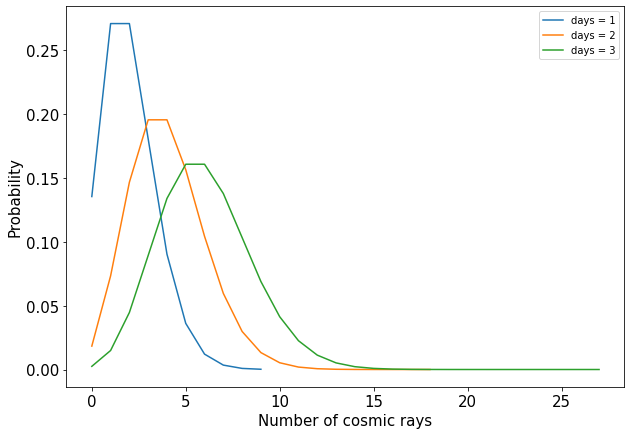

In [3]:
def calc_bin_width(x):
    size = len(x)
    return (x[size-1]-x[0])/size

def normalize(x, y):
    bin_width = calc_bin_width(x)
    sum_prob = 0
    for i in range (0, len(y)):
        sum_prob += y[i]*bin_width
        
    return y/sum_prob

# n = number of distributions being convolved
def convolve(n, p):
    conv_prob = p
    for i in range (0, n-1):
        conv_prob = np.convolve(conv_prob, p)
    
    size = len(conv_prob)
    x_values = []
    for i in range (0, size):
        x_values.append(i)
        
    return x_values, conv_prob

x_values2, conv_prob2 = convolve(2, y_poisson)
x_values3, conv_prob3 = convolve(3, y_poisson)

plt.plot(x_poisson, y_poisson, label = f'days = 1')
plt.plot(x_values2, conv_prob2, label = f'days = 2')
plt.plot(x_values3, conv_prob3, label = f'days = 3')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

As we sum more days, the probability distribution becomes wider and the distribution peak shifts to higher values of cosmic ray counts.

##### Part B.
Next, I will look at how the distribution looks after 5 days and I will ask the question: is the summed probability distribution still a Poisson distribution?

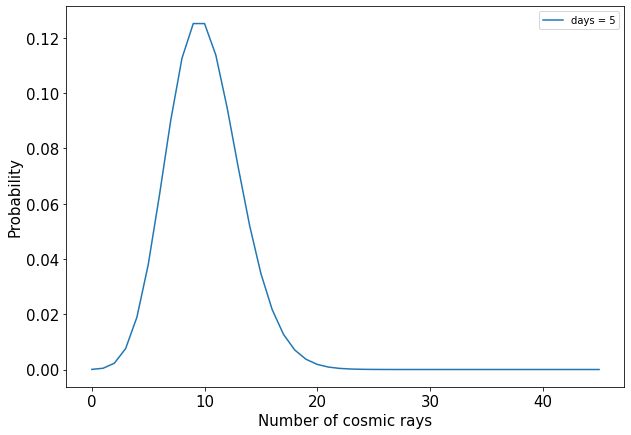

In [4]:
x_values5, conv_prob5 = convolve(5, y_poisson)
plt.plot(x_values5, conv_prob5, label = f'days = 5')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

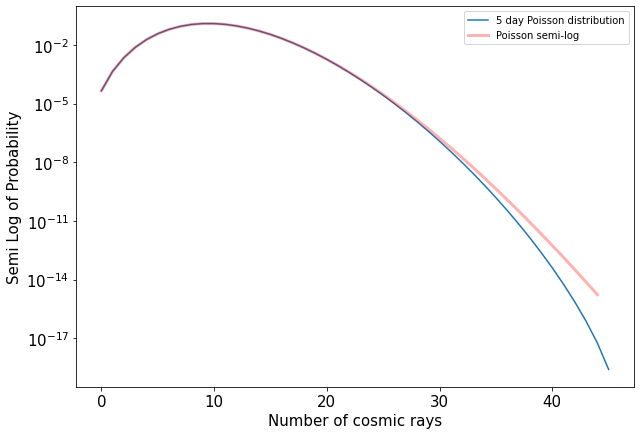

In [5]:
# Plot on a semi-log graph to see the distribution shape
plt.plot(x_values5, conv_prob5, label = f'5 day Poisson distribution')

x_poisson_new = []
y_poisson_new = []
for i in range (0, 45):
    x_poisson_new.append(i)
    y_poisson_new.append(stats.poisson.pmf(i, 10, loc=0))
plt.plot(x_poisson_new, y_poisson_new, 'r', linewidth = 3, alpha = 0.3, label = 'Poisson semi-log')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Semi Log of Probability', fontsize = 15)
plt.yscale('log')
plt.legend()
plt.show()

As we can observe, for small numbers of cosmic rays, the 5 day Poisson distribution matches up very closely with a Poisson distribution. At a larger number of rays, around 30, it starts to diverge away from the Poisson distribution.

Given the fact that the Poisson distribution's lambda parameter is also equal to the mean, we can calculate the mean of the convolved 5 day distribution and compare to the mean of the Poisson distribution graphed with the lambda = 10.

In [6]:
avg_conv5 = 0

for i in range (0, len(conv_prob5)):
    avg_conv5 += x_values5[i]*conv_prob5[i]
    
print(f'The mean of the 5 day Poisson distribution is lambda = {avg_conv5:.4f}.')

The mean of the 5 day Poisson distribution is lambda = 9.9958.


**TODO: Conceptually, it makes sense that summing multiple Poisson-distributed variables will still result in a Poisson distribution because the probability of occurances is still skewed to favor the events around a mean.**

##### Part C.
Now let's average days and let's see how the probability distribution evolves. I will calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger.

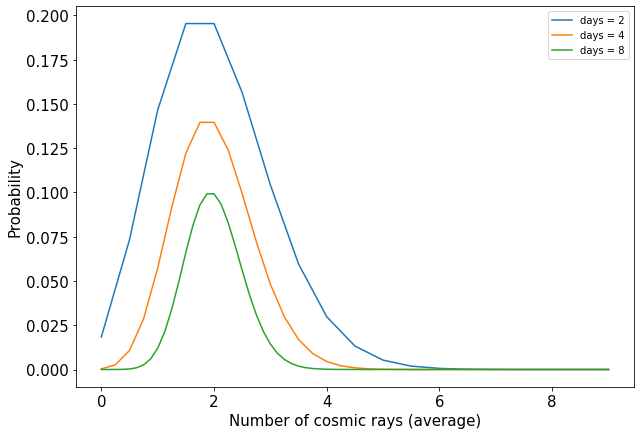

In [7]:
def avg_dist(n, p):
    x_values, conv_prob = convolve(n, p)
    
    size = len(conv_prob)
    x_avg = []
    for i in range (0, size):
        x_avg.append(x_values[i]/n)
    
    return x_avg, conv_prob

x_avg2, conv_prob2 = avg_dist(2, y_poisson)
x_avg4, conv_prob4 = avg_dist(4, y_poisson)
x_avg8, conv_prob8 = avg_dist(8, y_poisson)

plt.plot(x_avg2, conv_prob2, '-', label = f'days = 2')
plt.plot(x_avg4, conv_prob4, '-', label = f'days = 4')
plt.plot(x_avg8, conv_prob8, '-', label = f'days = 8')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays (average)', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

I can make the following observations:
- The width of the average of Poisson distributions tend to decrease as I average over more days
- The peak of the distribution stays at 2 occurences.

In [8]:
# Calculation of standard deviation
# def calc_exp_value(x, y, p):
#     exp_value = 0
#     size = len(x)
#     bin_width = (x[size-1]-x[0])/size
#     for i in range (0, len(x)):
#         exp_value += y[i]*(x[i]*bin_width)**p
#     return exp_value

# def calc_std_dev(x, y):
#     mean = calc_exp_value(x, y, 1)
#     exp_xsq = calc_exp_value(x, y, 2)
#     var = exp_xsq - mean**2
#     std_dev = var**0.5
#     return std_dev

# std_dev_2 = calc_std_dev(avg_dist(2), conv_poisson)
# std_dev_4 = calc_std_dev(avg_dist(4), conv_poisson)
# std_dev_8 = calc_std_dev(avg_dist(8), conv_poisson)

# print(f'The standard deviation for the 2 day average Poisson distribution is {std_dev_2:.4f}')
# print(f'The standard deviation for the 4 day average Poisson distribution is {std_dev_4:.4f}')
# print(f'The standard deviation for the 8 day average Poisson distribution is {std_dev_8:.4f}')

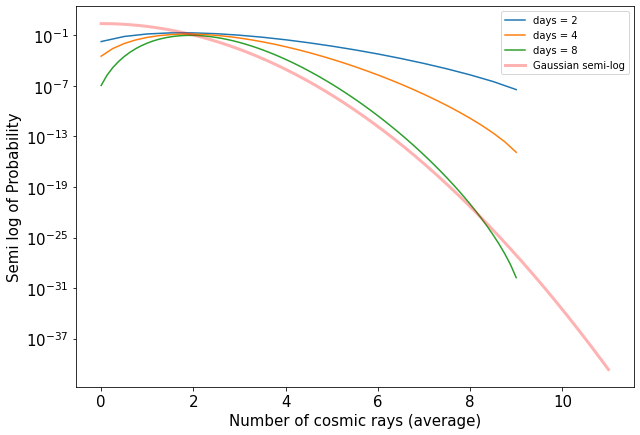

In [9]:
# Plot semi-log graphs for days = 2, 4, 8

plt.plot(x_avg2, conv_prob2, '-', label = f'days = 2')
plt.plot(x_avg4, conv_prob4, '-', label = f'days = 4')
plt.plot(x_avg8, conv_prob8, '-', label = f'days = 8')

x_gauss = np.linspace(0,11,1000)
y_gauss = 5*stats.norm.pdf(x_gauss, loc=0, scale = 1/1.25)
plt.plot(x_gauss, y_gauss, 'r', linewidth = 3, alpha = 0.3, label = 'Gaussian semi-log')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays (average)', fontsize = 15)
plt.ylabel('Semi log of Probability', fontsize = 15)
plt.yscale('log')
plt.legend()
plt.show()

The days = 2 semi-log plot looks like what I expected, a shape similar to the 5-day average distribution in part B.

As the number of days we average over increases from 2 to 8 however, the shape of the distribution becomes narrower. When we plot these distributions on a semi-log plot, and also have the Gaussian semi-log on the same plot, I can observe that the distribution of cosmic rays occurences becomes more and more similar to an upside-down parabola, characteristic of a Gaussian, as I average over more days.

##### Part D.

Recall that my original source has an average of 5 gamma rays/day, and the background noise (Poisson distributed) averages 2 rays/day.

Let's look at the case of taking measurements over multiple days. Say we take measurements over N = 3 days, and during this time I record Y x N = 3*10 = 30 gamma rays from my source. What would the 'sigma' of my observation be?

"What is the probability of the background giving me a data point that looks as signal like or more than the measurement I have?"

In [10]:
# TO DO:
# Ask a specific question
# Convert to a mathematical expression
    # Determine pdf of background
    # Determine how to integrate pdf to obtain the probability that the background produced a signal as signal-like or more than your candidate.
# Finally, convert the probability to a sigma
# Need to convolve Poisson 3 days, use the probability distribution that results, find the probability associated 

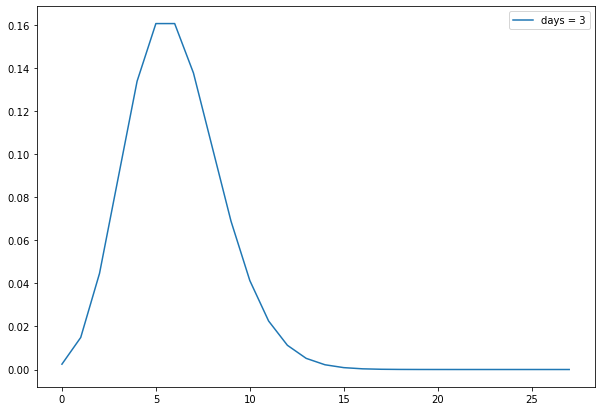

In [11]:
x_conv3, conv_prob3 = convolve(3, y_poisson)

plt.plot(x_conv3, conv_prob3, label = f'days = 3')
plt.legend()
plt.show()

In [12]:
# TO DO: FIGURE OUT HOW TO INTEGRATE PDF TO OBTAIN PROBABILITY.
# Expected value of poisson = variance = lambda parameter
def calc_exp_value(x, y, p):
    exp_value = 0
    size = len(x)
    bin_width = (x[size-1]-x[0])/size
    for i in range (0, len(x)):
        exp_value += y[i]*(x[i]*bin_width)**p
    return exp_value

mean_poisson3 = calc_exp_value(x_conv3, conv_prob3, 1)

prob_conv3 = stats.poisson.cdf(30, mean_poisson3)
print(prob_conv3)
sigma_conv3 = stats.norm.ppf(prob_conv3)
print(f'The probability that the background gave me a data point that looks as signal-like or more than 30 gamma rays is {1-prob_conv3:.15f}.')
print(f'This corresponds to a sigma for my observation of {sigma_conv3:.2f}.')

0.999999999999806
The probability that the background gave me a data point that looks as signal-like or more than 30 gamma rays is 0.000000000000194.
This corresponds to a sigma for my observation of 7.26.


#### Problem 2

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.
A) Show how the distribution changes as you average over more observing intervals.

Let's consider a skewed continuous distribution, an exponential distribution with parameter $\lambda$ = 2, as the background over an observation period of 1 hour. Let's first determine how the distribution changes as we average over more hours.

To do this, we will first take the convolution of this exponential distribution with itself, (n-1) number of times, then rescale the x-axis by 1/n to find the average.

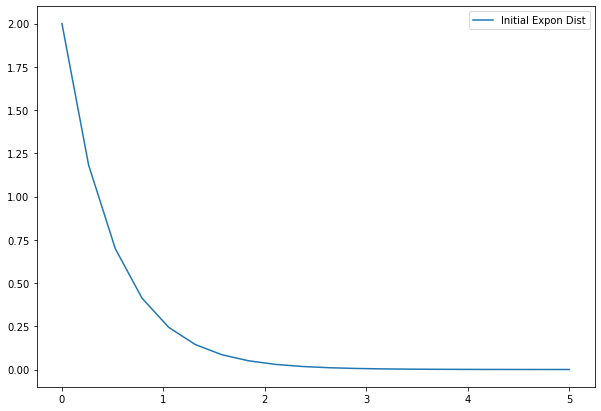

In [13]:
# Lambda = 2 implies scale = 1/lambda = 1/2
x_expon = np.linspace(0, 5, 20) #bin width = 1/2
y_expon = stats.expon.pdf(x_expon, scale = 1/2) # continuous
bin_width = 0.5

plt.plot(x_expon, y_expon, label = 'Initial Expon Dist')
plt.legend()
plt.show()

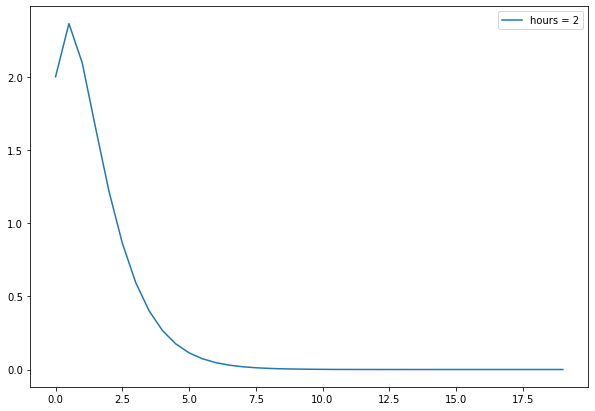

In [14]:
# Plotting several different averages
x_avg_expon2, y_conv_expon2 = avg_dist(2, y_expon)
plt.plot(x_avg_expon2, y_conv_expon2/2, '-', label = f'hours = 2') # rescale y to normalize

plt.legend()
plt.show()

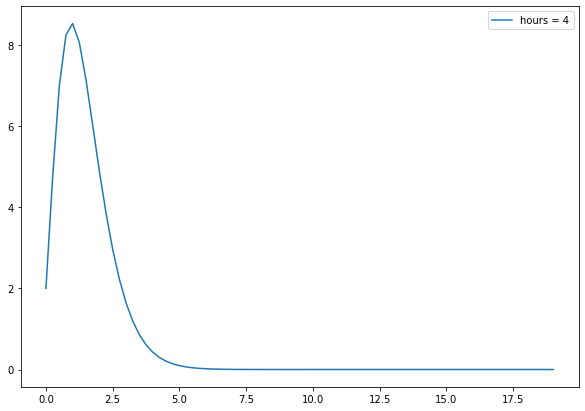

In [15]:
x_avg_expon4, y_conv_expon4 = avg_dist(4, y_expon)
plt.plot(x_avg_expon4, y_conv_expon4/8, '-', label = f'hours = 4') # rescale y to normalize

# check to make sure its normalized with Riemann sum: sum over y-value*bin width

plt.legend()
plt.show()

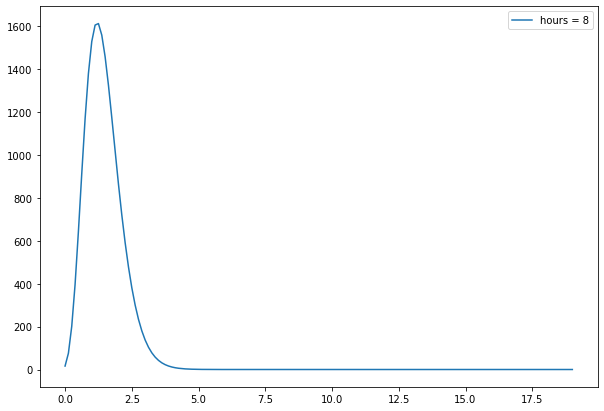

In [16]:
x_avg_expon8, y_conv_expon8 = avg_dist(8, y_expon)
plt.plot(x_avg_expon8, y_conv_expon8/16, '-', label = f'hours = 8')
plt.legend()
plt.show()

Observations: 

- peak of the function is still close to 0, but starts getting farther out as we increase the number of hours. 
- From the original, height increases

B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

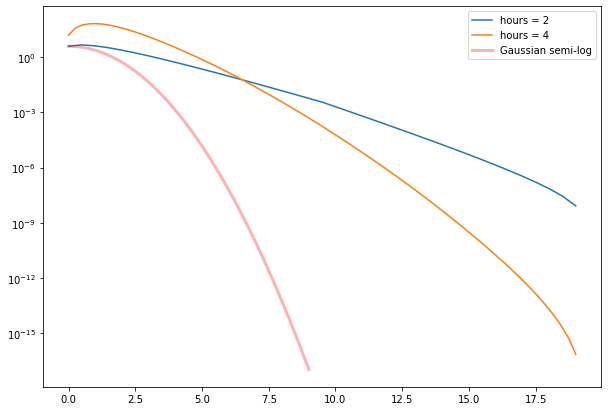

In [17]:
plt.plot(x_avg_expon2, y_conv_expon2, '-', label = f'hours = 2')
plt.plot(x_avg_expon4, y_conv_expon4, '-', label = f'hours = 4')

x_gauss = np.linspace(0,9,1000)
y_gauss = 10*stats.norm.pdf(x_gauss, loc=0, scale = 1/1)
plt.plot(x_gauss, y_gauss, 'r', linewidth = 3, alpha = 0.3, label = 'Gaussian semi-log')

plt.yscale('log')
plt.legend()
plt.show()

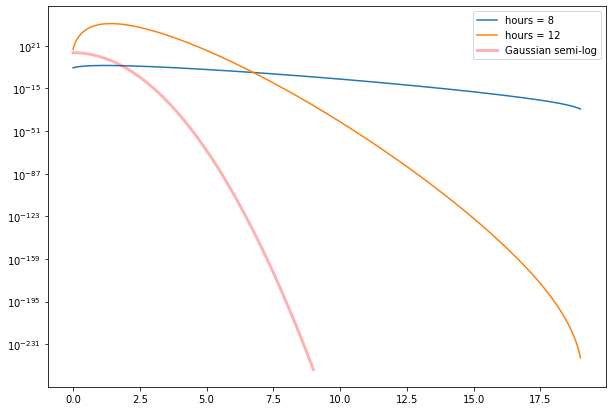

In [18]:
# Plot all on a semi-log graph

plt.plot(x_avg_expon8, y_conv_expon8, '-', label = f'hours = 8')

x_avg_expon20, y_conv_expon20 = avg_dist(60, y_expon)
plt.plot(x_avg_expon20, y_conv_expon20, '-', label = f'hours = 12')

x_gauss = np.linspace(0,9,1000)
y_gauss = 10e14*stats.norm.pdf(x_gauss, loc=0, scale = 1/3.9)
plt.plot(x_gauss, y_gauss, 'r', linewidth = 3, alpha = 0.3, label = 'Gaussian semi-log')

plt.yscale('log')
plt.legend()
plt.show()

As we increase the number of convolutions, we have to increase the standard deviation of the Gaussian distribution. It slightly appears to get somewhat closer to the Gaussian upside-down parabola shape.

#### Problem 3

For this problem we will assume we are using an optical telescope with a thermal noise background from the CCD. After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image. 

##### Version 1
Suppose I have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives me a very precise location, so I take an image of that part of the sky. But because of SWIFT's accuracy, I know which pixel in your image to look for a counterpart in.

##### Part A. 
From looking at all the other pixels in your image, I can measure the width of the background Gaussian distribution as 2. Let's assume I see a signal of strength 3.5. I would like to know the answer to the question,

**"What is the probability of the background giving me a data point that looks as signal like or more than the measurement I have?"**

In order to calculate the significance of this detection, I will integrate the probability distribution to the right of the signal I measured to get the probability, which I can use to then find the corresponding normal PDF sigma value.

TO DO: REPLACE PDF_GAUSS WITH ACTUAL PDF
$$\text{Probability = } \int_{10.5}^{\infty}pdf_{gauss}\text{dx}$$

In [19]:
width1 = 2
signal1 = 10.5

prob1 = stats.norm.cdf(signal1, scale = width1)
sigma1 = stats.norm.ppf(prob1)
print(f'The significance of my detection of a signal of strength {signal1:.2f} is sigma = {sigma1:.4f}.')

The significance of my detection of a signal of strength 10.50 is sigma = 5.2500.


 With a significance of 5.25 sigma, I can claim a discovery which traditionally requires 5-sigma or more.

##### Version 2
Now suppose I receive an alert from LIGO, but no associated detection from SWIFT. I know what region of the sky to look in, but not which pixel.

##### Part B
If I had to look for a signal in 10k pixels, I would like to know the answer to the following statistical question:
**"What is the probability of the background giving me a data point that looks as signal like or more than a measurement of signal strength 10.5?"**

To answer this question, I first need to know what the probability distribution of the background is. The Gaussian for 1 pixel has a mean of zero and a standard deviation of 2. In order to get the probability distribution of 10,000 pixels I would need to calculate the average of 10,000 1-pixel distributions. Instead of doing 10,000 convolutions and rescaling the x-axis, which requires a lot of processing power, I will instead approximate my background distribution by multiplying my original Gaussian distribution of 1 pixel by 10,000. Since we are working with an observation that is very rare in the original 1-pixel Gaussian distribution, this approximation can be made.

PROOF OF APPROXIMATION:

The probability that the 1-pixel background produced an event less than or equal to my signal in part A is 1-P, where P is the integral from signal = 10.5 to infinity. In the 10,000-pixel case, the probability that the 10,000 pixel background produced events less than or equal to my signal is (1-P)^N. For very small probabilities, this is approximately equal to 1-N P.

Therefore, the probability distribution of my background for 10,000 pixels is:
$$\text{Probability distribution = } $$

##### Part C.
Now let's taking my brightest candidate signal from the region, assuming it has the signal of 10.5 and calculate the significance of my detection.

The mathematical equation that answers my statistical question is:

$$\text{Probability = } \int_{10.5}^{\infty} pdf dx$$

In [20]:
prob2 = 10000*stats.norm.sf(signal1, scale = width1)
sigma2 = stats.norm.ppf(prob2)
sigma2 = abs(sigma2)

print(prob2)
print(sigma2)

0.00076049605164887
3.1706482274839223


#### Problem 4

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

A) Calculate the signal required for a 5-sigma detection in Version 1

In [22]:
sigma = 5
prob_5sig = stats.norm.sf(sigma, scale = 1)

signal_reqA = stats.norm.isf(prob_5sig, scale = width1)
print(signal_reqA)

10.000000000000002


B) Calculate the signal required for a 5-sigma detection in Version 2



In [23]:
signal_reqB = stats.norm.isf(prob_5sig/10000, scale = width1)

print(signal_reqB)

13.101075225410668


C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.


In [25]:
ratio_trials10k = signal_reqB/signal_reqA
print(ratio_trials10k)

1.3101075225410665


If I have a trials factor of 10,000, the signal must be 31% brighter for discovery. 

My intuition may lead me to believe that the signal has to be much larger for discovery, but this is not the case. As I average more and more events, the width of the resulting background probability distribution decreases. This is because it becomes less likely to get rare events on average. Thus, the sensitivity penalty is fairly low.


D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

In [49]:
sigma = 5
prob_5sig = stats.norm.sf(sigma, scale = 1)

signal_reqA = stats.norm.isf(prob_5sig, scale = width1)
print(signal_reqA)
signal_reqB = stats.norm.isf(prob_5sig/100000, scale = width1) #trials factor = 100k
print(signal_reqB)
print(signal_reqB/signal_reqA)

10.000000000000002
13.772261438194494
1.377226143819449


Extra credit: If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.